In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Tutte le colonne sono features. La prima colonna (Customer ID), è totalmente irrilevante, per cui si deve eliminare.

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3,4]].values

Il metodo "ward" è il metodo della minima varianza all'interno del cluster. E' il metodo consigliato per un cluster gerarchico.

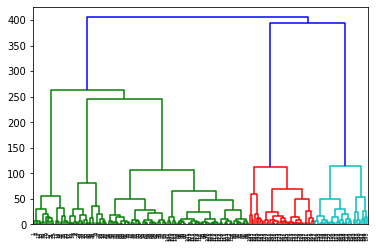

In [4]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian Distance")

Per trovare il valore di treshold ottimale, bisogna trovare:

1.   La linea verticale più lunga
2.   Che non viene MAI tagliata da una linea orizzontale
3. Le linee orizzontali sono i prolungamenti delle linee orizzontali del dendrogramma

In questo caso il numero ottimale è 5 in quanto la linea puo essere tracciata tra 120 e 240.



In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y = hc.fit_predict(X);
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


No handles with labels found to put in legend.


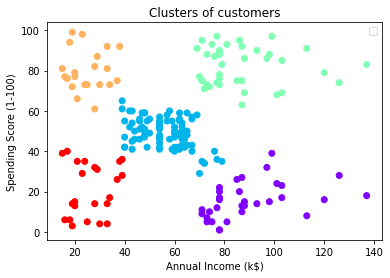

In [8]:
plt.scatter(X[:,0] , X[:,1] , c=y , cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()